## Code from the lecture slides

Own inversion
[[3.84381383]
 [3.0957783 ]]
sgdreg from scikit
[3.86876495] [3.11207818]
theta frm own gd
[[3.84381383]
 [3.0957783 ]]
theta from own sdg
[[3.9005589 ]
 [3.01572769]]


C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


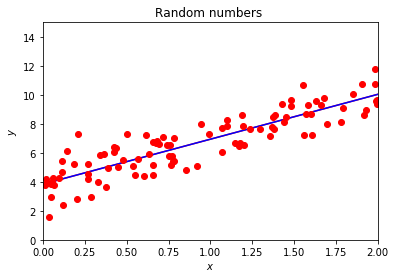

In [11]:
# Importing various packages
from math import exp, sqrt
from random import random, seed
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor

x = 2*np.random.rand(100,1)
y = 4+3*x+np.random.randn(100,1)

xb = np.c_[np.ones((100,1)), x]
theta_linreg = np.linalg.inv(xb.T.dot(xb)).dot(xb.T).dot(y)
print("Own inversion")
print(theta_linreg)
sgdreg = SGDRegressor(n_iter = 50, penalty=None, eta0=0.1)
sgdreg.fit(x,y.ravel())
print("sgdreg from scikit")
print(sgdreg.intercept_, sgdreg.coef_)


theta = np.random.randn(2,1)

eta = 0.1
Niterations = 1000
m = 100

for iter in range(Niterations):
    gradients = 2.0/m*xb.T.dot(xb.dot(theta)-y)
    theta -= eta*gradients
print("theta frm own gd")
print(theta)

xnew = np.array([[0],[2]])
xbnew = np.c_[np.ones((2,1)), xnew]
ypredict = xbnew.dot(theta)
ypredict2 = xbnew.dot(theta_linreg)


n_epochs = 50
t0, t1 = 5, 50
m = 100
def learning_schedule(t):
    return t0/(t+t1)

theta = np.random.randn(2,1)

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = xb[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients =  2 * xi.T @ ((xi @ theta)-yi)
        eta = learning_schedule(epoch*m+i)
        theta = theta - eta*gradients
print("theta from own sdg")
print(theta)






plt.plot(xnew, ypredict, "r-")
plt.plot(xnew, ypredict2, "b-")
plt.plot(x, y ,'ro')
plt.axis([0,2.0,0, 15.0])
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.title(r'Random numbers ')
plt.show()
